In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

df=pd.read_csv('alzheimer_dataset.csv')
df.head()

,Group,Gender (M/F),Age,Education (EDUC),Socio-Economic Status (SES),Mini-Mental State Examination (MMSE),Clinical Dementia Rating (CDR),Estimated Total Intracranial Volume (eTIV),Normalized Whole Brain Volume (nWBV),Atlas Scaling Factor (ASF)
0,Demented,F,49,9,6,17,2.0,1117,0.582071,0.550096
1,Demented,M,54,11,6,19,1.0,1755,0.469858,1.441718
2,Demented,F,65,10,6,24,3.0,1616,0.536315,0.765014
3,Demented,M,60,17,4,23,3.0,1524,0.411373,1.301752
4,Demented,M,54,11,2,20,2.0,1127,0.570805,1.870603


In [2]:
# Define age categories
bins = [30, 45, 60, 75, np.inf]
labels = ['30 to 45', '46 to 60', '61 to 75', '75 above']

# Add Age_Category column
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count the number of occurrences in each age group
age_groups_count = df['Age_Category'].value_counts().sort_index()

print("Age Groups and Counts:")
print(age_groups_count)

Age Groups and Counts:
Age_Category
30 to 45    1160
46 to 60    1034
61 to 75    1170
75 above    1136
Name: count, dtype: int64


In [3]:
# # Gender (M/F)
# # Education (EDUC)
# # Socio-Economic Status (SES)
# # Mini-Mental State Examination (MMSE)
# # Clinical Dementia Rating (CDR)
# # Estimated Total Intracranial Volume (eTIV)
# # Normalized Whole Brain Volume (nWBV)
# # Atlas Scaling Factor (ASF)
# # Age Category

In [4]:
df.head()

,Group,Gender (M/F),Age,Education (EDUC),Socio-Economic Status (SES),Mini-Mental State Examination (MMSE),Clinical Dementia Rating (CDR),Estimated Total Intracranial Volume (eTIV),Normalized Whole Brain Volume (nWBV),Atlas Scaling Factor (ASF),Age_Category
0,Demented,F,49,9,6,17,2.0,1117,0.582071,0.550096,46 to 60
1,Demented,M,54,11,6,19,1.0,1755,0.469858,1.441718,46 to 60
2,Demented,F,65,10,6,24,3.0,1616,0.536315,0.765014,61 to 75
3,Demented,M,60,17,4,23,3.0,1524,0.411373,1.301752,61 to 75
4,Demented,M,54,11,2,20,2.0,1127,0.570805,1.870603,46 to 60


In [5]:
df.columns

Index(['Group', 'Gender (M/F)', 'Age', 'Education (EDUC)',
       'Socio-Economic Status (SES)', 'Mini-Mental State Examination (MMSE)',
       'Clinical Dementia Rating (CDR)',
       'Estimated Total Intracranial Volume (eTIV)',
       'Normalized Whole Brain Volume (nWBV)', 'Atlas Scaling Factor (ASF)',
       'Age_Category'],
      dtype='object')

In [6]:
df.shape

(4500, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   Group                                       4500 non-null   object  
 1   Gender (M/F)                                4500 non-null   object  
 2   Age                                         4500 non-null   int64   
 3   Education (EDUC)                            4500 non-null   int64   
 4   Socio-Economic Status (SES)                 4500 non-null   int64   
 5   Mini-Mental State Examination (MMSE)        4500 non-null   int64   
 6   Clinical Dementia Rating (CDR)              4500 non-null   float64 
 7   Estimated Total Intracranial Volume (eTIV)  4500 non-null   int64   
 8   Normalized Whole Brain Volume (nWBV)        4500 non-null   float64 
 9   Atlas Scaling Factor (ASF)                  4500 non-null   float64 
 10  

In [8]:
df['Group'].value_counts()

Group
Demented       2250
Nondemented    2250
Name: count, dtype: int64

In [9]:
df.columns

Index(['Group', 'Gender (M/F)', 'Age', 'Education (EDUC)',
       'Socio-Economic Status (SES)', 'Mini-Mental State Examination (MMSE)',
       'Clinical Dementia Rating (CDR)',
       'Estimated Total Intracranial Volume (eTIV)',
       'Normalized Whole Brain Volume (nWBV)', 'Atlas Scaling Factor (ASF)',
       'Age_Category'],
      dtype='object')

In [10]:
df= df.rename(columns={'Gender (M/F)': 'Gender_(M/F)'})
df= df.rename(columns={'Mini-Mental State Examination (MMSE)': 'MMSE'})
df= df.rename(columns={'Clinical Dementia Rating (CDR)': 'CDR'})
df= df.rename(columns={'Estimated Total Intracranial Volume (eTIV)': 'eTIV'})
df= df.rename(columns=
              {'Normalized Whole Brain Volume (nWBV)': 'nWBV'})
df= df.rename(columns={'Atlas Scaling Factor (ASF)': 'ASF'})
df= df.rename(columns={'Socio-Economic Status (SES)': 'SES'})
df= df.rename(columns={'Education (EDUC)': 'EDUC'})


In [11]:
df['Gender_(M/F)'].value_counts()

Gender_(M/F)
F    2286
M    2214
Name: count, dtype: int64

In [12]:
df['Age_Category'].value_counts()

Age_Category
61 to 75    1170
30 to 45    1160
75 above    1136
46 to 60    1034
Name: count, dtype: int64

In [13]:
df['MMSE'].value_counts()

MMSE
26    473
28    462
27    446
30    439
29    430
19    301
24    291
23    287
18    287
20    276
17    272
22    271
21    265
Name: count, dtype: int64

In [14]:
df['CDR'].value_counts()

CDR
0.0    1137
0.5    1113
1.0     768
2.0     760
3.0     722
Name: count, dtype: int64

In [15]:
df['SES'].value_counts()

SES
8     582
9     574
10    555
7     539
3     409
2     390
1     385
4     378
6     355
5     333
Name: count, dtype: int64

In [16]:
df['nWBV'].value_counts()

nWBV
0.582071    1
0.753437    1
0.751253    1
0.815137    1
0.706895    1
           ..
0.489250    1
0.416904    1
0.510058    1
0.527771    1
0.819246    1
Name: count, Length: 4500, dtype: int64

In [17]:
df['eTIV'].value_counts()

eTIV
1518    15
1716    14
1370    11
1353    11
1034    11
        ..
1711     1
1588     1
1244     1
1458     1
1311     1
Name: count, Length: 990, dtype: int64

In [18]:
df['ASF'].value_counts()

ASF
0.550096    1
1.202853    1
0.981256    1
1.791292    1
1.933571    1
           ..
1.311584    1
0.526533    1
1.411656    1
1.638023    1
1.286826    1
Name: count, Length: 4500, dtype: int64

In [19]:
df['ASF'].astype(int).value_counts()

ASF
1    3045
0    1455
Name: count, dtype: int64

In [20]:
df.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,59.668667,12.324667,5.965333,24.234889,1.113444,1497.279556,0.649813,1.250624
std,17.441656,4.030024,2.917651,4.189359,1.054772,289.597526,0.160346,0.429151
min,30.000000,6.000000,1.000000,17.000000,0.000000,1000.000000,0.400046,0.500067
25%,44.000000,9.000000,3.000000,20.000000,0.000000,1248.750000,0.499288,0.883177
50%,60.000000,12.000000,6.500000,25.000000,0.750000,1499.500000,0.650062,1.242750
75%,75.000000,16.000000,9.000000,28.000000,2.000000,1742.000000,0.798089,1.621906
max,89.000000,19.000000,10.000000,30.000000,3.000000,1999.000000,0.899844,1.999704


In [21]:
df.dtypes

Group             object
Gender_(M/F)      object
Age                int64
EDUC               int64
SES                int64
MMSE               int64
CDR              float64
eTIV               int64
nWBV             float64
ASF              float64
Age_Category    category
dtype: object

In [22]:
df.drop('Age', axis=1, inplace=True)


In [23]:
label_encoder = LabelEncoder()

# Apply label encoding to 'Group'
df['Gender_(M/F)'] = label_encoder.fit_transform(df['Gender_(M/F)'])
df['Age_Category'] = label_encoder.fit_transform(df['Age_Category'])

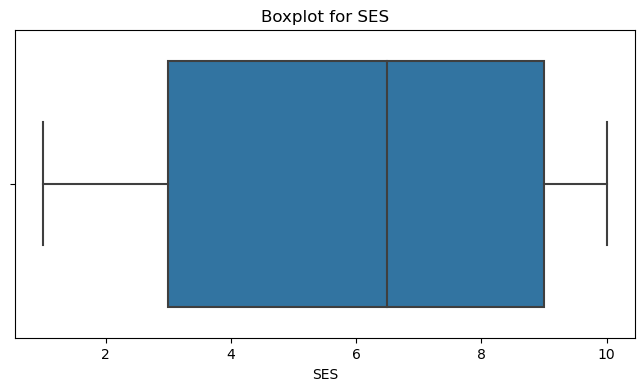

<Figure size 800x400 with 0 Axes>

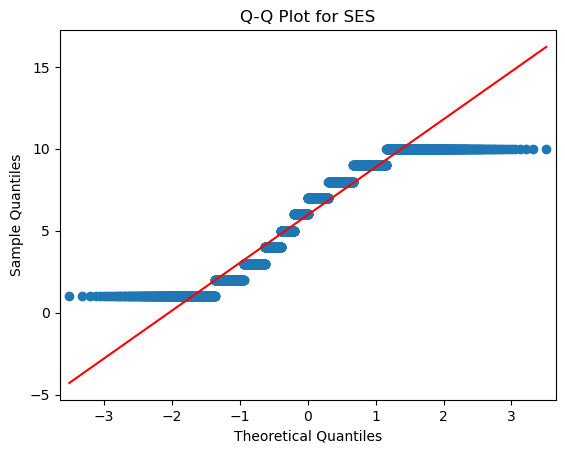

Shapiro-Wilk test for SES:
Statistic: 0.921400249004364, p-value: 1.807675018979014e-43
The data for SES does not appear to be normally distributed.


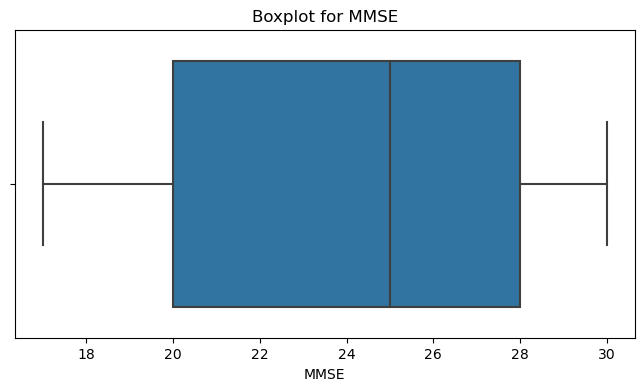

<Figure size 800x400 with 0 Axes>

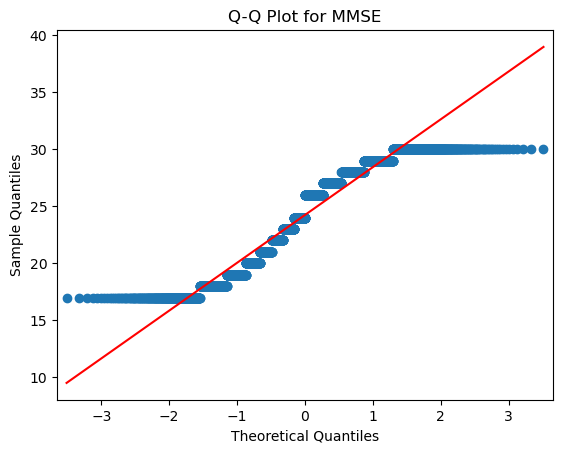

Shapiro-Wilk test for MMSE:
Statistic: 0.9193535447120667, p-value: 7.146622168056567e-44
The data for MMSE does not appear to be normally distributed.


In [24]:
# Function to check for outliers using box plots
def check_outliers(df, column_name):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot for {column_name}')
    plt.show()

# Function to check for normality using Q-Q plot and Shapiro-Wilk test
def check_normality(df, column_name):
    # Q-Q plot
    plt.figure(figsize=(8, 4))
    qqplot(df[column_name], line='s')
    plt.title(f'Q-Q Plot for {column_name}')
    plt.show()

    # Shapiro-Wilk test for normality
    stat, p_value = shapiro(df[column_name])
    print(f'Shapiro-Wilk test for {column_name}:')
    print(f'Statistic: {stat}, p-value: {p_value}')
    if p_value > 0.05:
        print(f'The data for {column_name} appears to be normally distributed.')
    else:
        print(f'The data for {column_name} does not appear to be normally distributed.')


# Example usage for a specific column
column_of_interest = ['SES', 'MMSE']

for col in column_of_interest:
    check_outliers(df, col)
    check_normality(df, col)

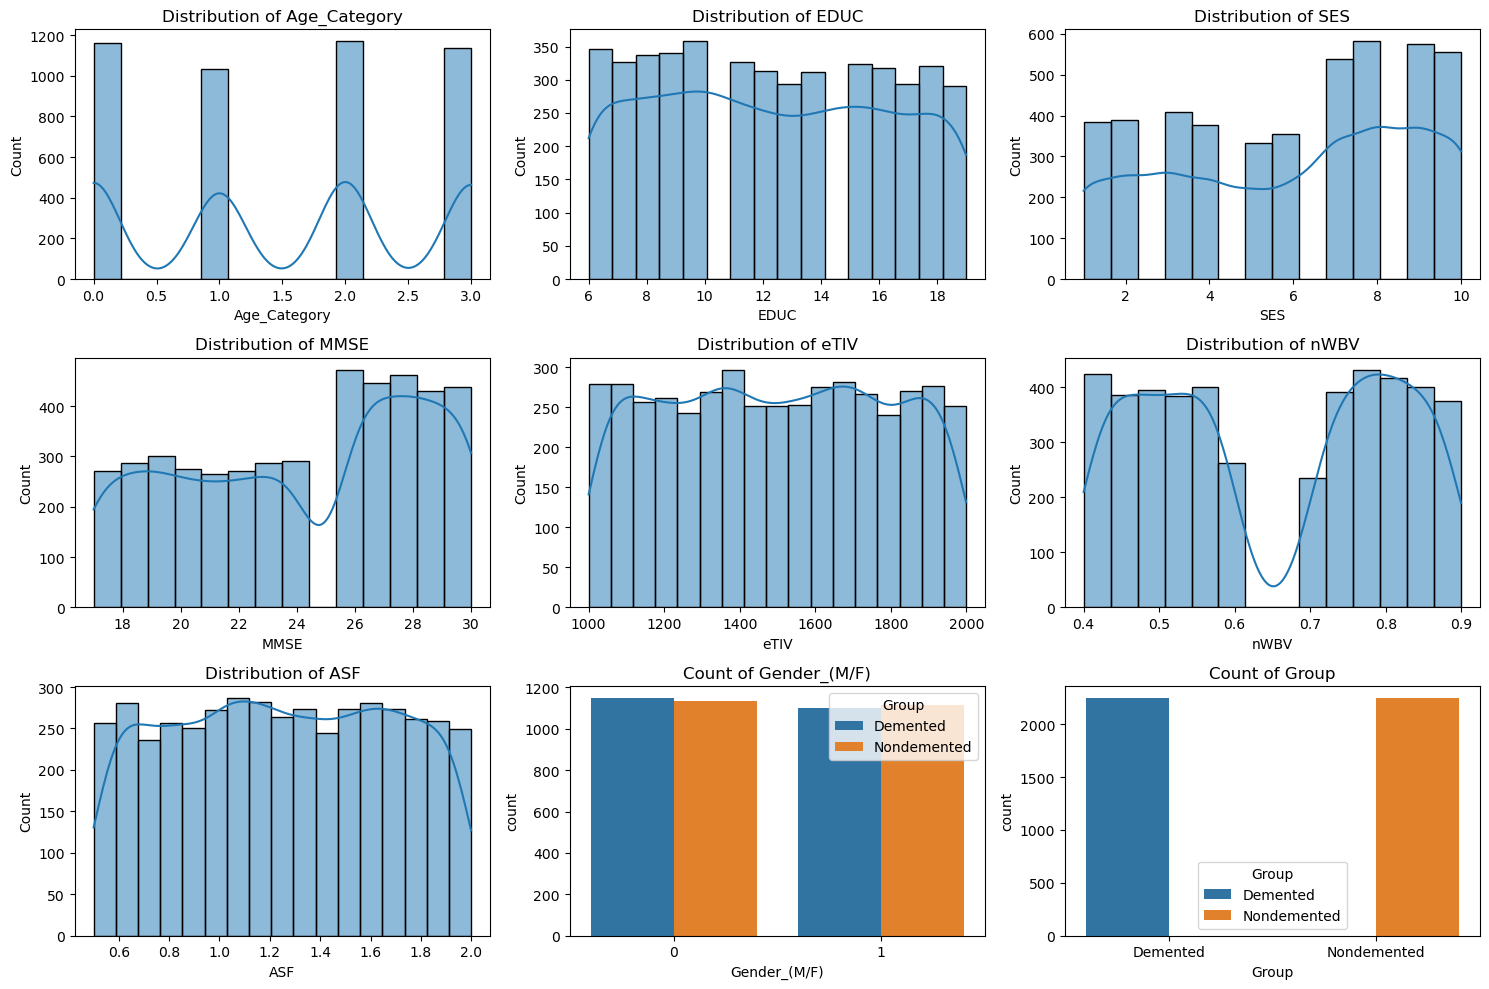

In [25]:
# Set up the figure size
plt.figure(figsize=(15, 10))

# Univariate Analysis for Numeric Features
numeric_features = ['Age_Category', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

# Univariate Analysis for Categorical Features
categorical_features = ['Gender_(M/F)', 'Group']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i + 7)  # Adjust subplot position for categorical features
    sns.countplot(data=df, x=feature, hue='Group')
    plt.title(f'Count of {feature}')

plt.tight_layout()
plt.show()

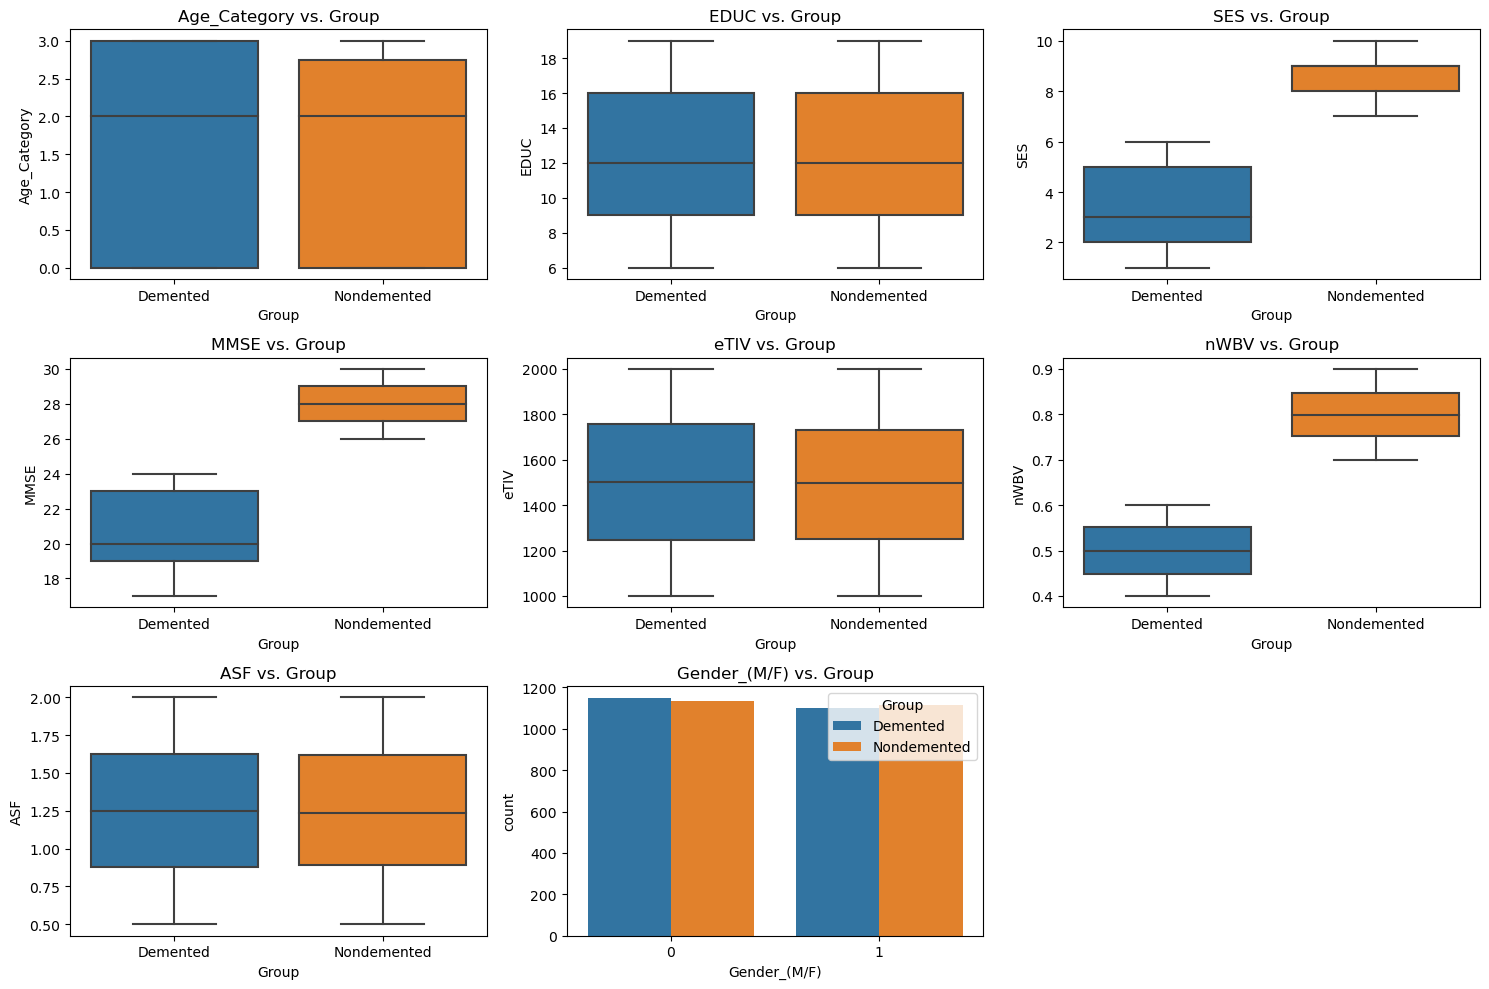

In [26]:
# Bivariate Analysis
# Set up the figure size
plt.figure(figsize=(15, 10))

# Bivariate Analysis for Numeric Features
numeric_features = ['Age_Category', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Group', y=feature, data=df)
    plt.title(f'{feature} vs. Group')

# Bivariate Analysis for Categorical Features
categorical_features = ['Gender_(M/F)']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i + 7)  # Adjust subplot position for categorical features
    sns.countplot(x=feature, hue='Group', data=df)
    plt.title(f'{feature} vs. Group')

plt.tight_layout()
plt.show()


In [ ]:
# Select relevant features including the target variable 'Group'
selected_features = ['Age_Category', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF', 'Gender_(M/F)', 'Group']

# Create a pair plot
sns.pairplot(df[selected_features], hue='Group', markers=['o', 's', 'D'], diag_kind='kde', height=2.5)
plt.suptitle('Pair Plot of Features by Group', y=1.02)
plt.show()


In [ ]:
# Create a correlation matrix
correlation_matrix = df[['Age_Category', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [ ]:
# Split the data into train and test sets
X = df.drop('Group', axis=1)
y = df['Group']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Support Vector Machine (SVM) Classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# k-Nearest Neighbors (KNN) Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# Evaluate models
print("Support Vector Machine (SVM) Classifier:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))

print("\nk-Nearest Neighbors (KNN) Classifier:")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Classification Report:\n", classification_report(y_test, knn_pred))

In [ ]:
df.sample(5)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have a trained KNN model
# knn = ...  # Load your trained KNN model here

# Create a DataFrame with the provided data
data = pd.DataFrame({
    'Gender_(M/F)': [1],
    'EDUC': [18],
    'SES': [8],
    'MMSE': [30],
    'CDR': [0.0],
    'eTIV': [1551],
    'nWBV': [0.769693],
    'ASF': [1.516465],
    'Age_Category': [0]  # Age_Category value is not provided, set to 0 for demonstration
})

# Make predictions using the pre-trained KNN model
# Replace 'knn' with your trained KNN model
predictions = knn_model.predict(data)

print(f"Predicted CDR: {predictions[0]}")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have a trained KNN model
# knn = ...  # Load your trained KNN model here

# Create a DataFrame with the provided data
data = pd.DataFrame({
    'Gender_(M/F)': [0],
    'EDUC': [9],
    'SES': [2],
    'MMSE': [17],
    'CDR': [1.0],
    'eTIV': [1579],
    'nWBV': [0.561039],
    'ASF': [1.232217],
    'Age_Category': [0]  # Age_Category value is not provided, set to 0 for demonstration
})

# Make predictions using the pre-trained KNN model
# Replace 'knn' with your trained KNN model
predictions = knn_model.predict(data)

print(f"Predicted CDR: {predictions[0]}")


In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.neighbors import KNeighborsClassifier

# # Assuming you have a trained KNN model
# # knn = ...  # Load your trained KNN model here

# # Get user input for each column
# gender = int(input("Enter M/F (0 for Female, 1 for Male): "))
# educ = int(input("Enter EDUC: "))
# ses = int(input("Enter SES: "))
# mmse = int(input("Enter MMSE: "))
# cdr = float(input("Enter CDR: "))
# etiv = int(input("Enter eTIV: "))
# nwv = float(input("Enter nWBV: "))
# asf = float(input("Enter ASF: "))
# age_category = int(input("Enter Age_Category (1 for 30 to 45, 2 for 46 to 55, 3 for 56 to 70, 4 for 70 above): "))

# # Create a DataFrame from user input
# data = pd.DataFrame({
#     'M/F': [gender],
#     'EDUC': [educ],
#     'SES': [ses],
#     'MMSE': [mmse],
#     'CDR': [cdr],
#     'eTIV': [etiv],
#     'nWBV': [nwv],
#     'ASF': [asf],
#     'Age_Category': [age_category]
# })

# data

In [ ]:
# # Make predictions using the pre-trained KNN model
# # Replace 'knn' with your trained KNN model
# predictions = knn_model.predict(data)

# # Display predictions
# print(f"Predicted CDR: {predictions[0]}")

In [ ]:
# Nondemented	1	18	8	30	0.0	1551	0.769693	1.516465	0
# Demented	0	9	2	17	1.0	1579	0.561039	1.232217	0

In [ ]:
# !pip install requests joblib


In [ ]:
import joblib

# Assuming 'knn' is your trained KNN model
# Save the model to a pickle file
joblib.dump(knn_model, 'report_model.pkl')
